In [2]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import colorConverter
import seaborn as sns

%matplotlib inline

Copy over some old plotting functions...

In [6]:
def prepare_plot():
    """
    Set up general plot aesthetics to be used for including figures in a manuscript or talk.
    These defaults are possibly too large for interactive use.
    This function should be called before `paper_plot`.
    """
    sns.set()
    # Increase font size and linewidth
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 5})
    sns.set_style("white")
    # Use LaTeX, setup to use Helvetica. This can be safely commented to make
    # the installation footprint of running this code smaller -- for example,
    # in Docker.
    mpl.rc('text', usetex=True)
    mpl.rcParams['text.latex.preamble'] = [
        r'\usepackage{amsmath}',
        r'\usepackage{helvet}',
        r'\usepackage[EULERGREEK]{sansmath}',
        r'\sansmath',
        r'\renewcommand{\familydefault}{\sfdefault}',
        r'\usepackage[T1]{fontenc}',
        r'\usepackage{graphicx}'
    ]

def paper_plot(fig, adjustment=0, scientific=False, save=False, filename=None,
               raster=False, label_pad=True):
    """
    Take a prepared figure and make additional adjustments for inclusion in manuscript:
    mostly tick thickness, length, and label padding, and include only the left and the bottom
    axis spines. It would be nice to force the axes to end on a major tick, but I haven't
    figured out how to do that yet.
    """
    for ax in fig.axes:
        # Increase padding
        ax.tick_params(which='major', direction='out', length=10, pad=10)
        ax.tick_params(which='minor', direction='out', length=5)
        # If plotting with pi, increase the x tick size specifically
        # ax.tick_params(axis='x', labelsize=40, pad=-10)
        # Increase tick thickness
        ax.xaxis.set_tick_params(width=2)
        ax.yaxis.set_tick_params(width=2)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        if label_pad:
            # Increase padding
            ax.xaxis.labelpad = 15
            ax.yaxis.labelpad = 15
        # Make the background color white
        facecolor = 'white'
        if facecolor is False:
            facecolor = fig.get_facecolor()
        alpha = 1
        color_with_alpha = colorConverter.to_rgba(facecolor, alpha)
        fig.patch.set_facecolor(color_with_alpha)
        # Stick the scientific notation into the axis label, instead of the
        # default position which in the corner, which really makes no sense.
        if ax.xaxis.get_scale() == 'linear':
            if scientific:
                pretty_label(ax)
            ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
            ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        elif ax.xaxis.get_scale() == 'log':
            pass
        # For scatter plots, where points get cut off
        if adjustment != 0:
            x0, x1, y0, y1 = ax.axis()
            ax.xaxis((x0 - adjustment,
                      x1 + adjustment,
                      y0,
                      y1
                     ))
        # Make axes thicker
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(2)
    if save:
        plt.savefig(filename + '.png', dpi=300, bbox_inches='tight')
        plt.savefig(filename + '.svg', dpi=300, bbox_inches='tight')

In [7]:
prepare_plot()

Read in data generated by `analyze.py`, where the data is structured, for each line

```
Fraction of data analyzed, attach FE, attach FE SEM, frames, pull FE, pull FE SEM, frames, release free energy
```

For uncertainty analysis with thermodynamic integration, the files have `ti` in their name, otherwise assume MBAR.

In [10]:
# Simulations with 5 ns per window, and `cut = 9`
# Stored on `kirkwood`

oa_g3_0 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA/OA-G3-0-fe.log')
oa_g3_1 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA/OA-G3-1-fe.log')
oa_g3_2 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA/OA-G3-2-fe.log')
oa_g3_3 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA/OA-G3-3-fe.log')
oa_g3_4 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA/OA-G3-4-fe.log')

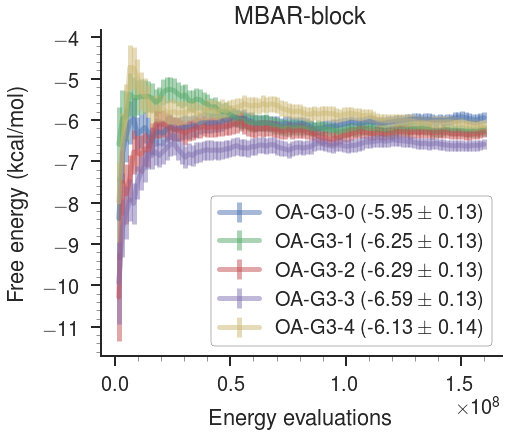

In [11]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

oa_g3_0_fe = -1 * (oa_g3_0[:,1] + oa_g3_0[:,4] + oa_g3_0[:,7])
oa_g3_1_fe = -1 * (oa_g3_1[:,1] + oa_g3_1[:,4] + oa_g3_1[:,7])
oa_g3_2_fe = -1 * (oa_g3_2[:,1] + oa_g3_2[:,4] + oa_g3_2[:,7])
oa_g3_3_fe = -1 * (oa_g3_3[:,1] + oa_g3_3[:,4] + oa_g3_3[:,7])
oa_g3_4_fe = -1 * (oa_g3_4[:,1] + oa_g3_4[:,4] + oa_g3_4[:,7])


oa_g3_0_sem = np.sqrt(oa_g3_0[:,2]**2 + oa_g3_0[:,5]**2)
oa_g3_1_sem = np.sqrt(oa_g3_1[:,2]**2 + oa_g3_1[:,5]**2)
oa_g3_2_sem = np.sqrt(oa_g3_2[:,2]**2 + oa_g3_2[:,5]**2)
oa_g3_3_sem = np.sqrt(oa_g3_3[:,2]**2 + oa_g3_3[:,5]**2)
oa_g3_4_sem = np.sqrt(oa_g3_4[:,2]**2 + oa_g3_4[:,5]**2)


ax1.errorbar( (oa_g3_0[:,3] + oa_g3_0[:,6]) * 250, y=oa_g3_0_fe, yerr=oa_g3_0_sem, 
             label=f'OA-G3-0 ({oa_g3_0_fe[-1]:0.2f} $\pm$ {oa_g3_0_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g3_1[:,3] + oa_g3_1[:,6]) * 250, y=oa_g3_1_fe, yerr=oa_g3_1_sem, 
             label=f'OA-G3-1 ({oa_g3_1_fe[-1]:0.2f} $\pm$ {oa_g3_1_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g3_2[:,3] + oa_g3_2[:,6]) * 250, y=oa_g3_2_fe, yerr=oa_g3_2_sem, 
             label=f'OA-G3-2 ({oa_g3_2_fe[-1]:0.2f} $\pm$ {oa_g3_2_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g3_3[:,3] + oa_g3_3[:,6]) * 250, y=oa_g3_3_fe, yerr=oa_g3_3_sem, 
             label=f'OA-G3-3 ({oa_g3_3_fe[-1]:0.2f} $\pm$ {oa_g3_3_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g3_4[:,3] + oa_g3_4[:,6]) * 250, y=oa_g3_4_fe, yerr=oa_g3_4_sem, 
             label=f'OA-G3-4 ({oa_g3_4_fe[-1]:0.2f} $\pm$ {oa_g3_4_sem[-1]:0.2f})', alpha=0.5)


ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('MBAR-block')
paper_plot(fig)

In [12]:
print(f'Mean OA-G3: {np.mean([oa_g3_0_fe[-1], oa_g3_1_fe[-1], oa_g3_2_fe[-1], oa_g3_3_fe[-1], oa_g3_4_fe[-1]])}')
print(f'Std Dev OA-G3: {np.std([oa_g3_0_fe[-1], oa_g3_1_fe[-1], oa_g3_2_fe[-1], oa_g3_3_fe[-1], oa_g3_4_fe[-1]])}')

Mean OA-G3: -6.241508360113972
Std Dev OA-G3: 0.2106719240760245


## Compare with `cut = 9`...

In [13]:
# Simulations with 5 ns per window, and `cut = 9`
# Stored on `kirkwood`

oa_g3_0_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA_cut9/OA-G3-0-fe.log')
oa_g3_1_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA_cut9/OA-G3-1-fe.log')
oa_g3_2_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA_cut9/OA-G3-2-fe.log')
oa_g3_3_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA_cut9/OA-G3-3-fe.log')
oa_g3_4_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA_cut9/OA-G3-4-fe.log')

OSError: /home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA_cut9/OA-G3-0-fe.log not found.

In [ ]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])


ax1.errorbar( (oa_g3_0_9[:,3] + oa_g3_0_9[:,6]) * 250, y=oa_g3_0_fe, yerr=oa_g3_0_sem, 
             label=f'OA-G3-0 ({oa_g3_0_fe[-1]:0.2f} $\pm$ {oa_g3_0_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g3_1[:,3] + oa_g3_1[:,6]) * 250, y=oa_g3_1_fe, yerr=oa_g3_1_sem, 
             label=f'OA-G3-1 ({oa_g3_1_fe[-1]:0.2f} $\pm$ {oa_g3_1_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g3_2[:,3] + oa_g3_2[:,6]) * 250, y=oa_g3_2_fe, yerr=oa_g3_2_sem, 
             label=f'OA-G3-2 ({oa_g3_2_fe[-1]:0.2f} $\pm$ {oa_g3_2_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g3_3[:,3] + oa_g3_3[:,6]) * 250, y=oa_g3_3_fe, yerr=oa_g3_3_sem, 
             label=f'OA-G3-3 ({oa_g3_3_fe[-1]:0.2f} $\pm$ {oa_g3_3_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g3_4[:,3] + oa_g3_4[:,6]) * 250, y=oa_g3_4_fe, yerr=oa_g3_4_sem, 
             label=f'OA-G3-4 ({oa_g3_4_fe[-1]:0.2f} $\pm$ {oa_g3_4_sem[-1]:0.2f})', alpha=0.5)


ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('MBAR-block')
paper_plot(fig)

In [135]:
oa_g3_0_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-0-fe-all.log')
oa_g3_1_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-1-fe-all.log')
oa_g3_2_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-2-fe-all.log')
oa_g3_3_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-3-fe-all.log')
oa_g3_4_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-4-fe-all.log')

In [145]:
oa_g6_0_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-0-fe-all.log')
oa_g6_1_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-1-fe-all.log')
oa_g6_2_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-2-fe-all.log')
oa_g6_3_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-3-fe-all.log')
oa_g6_4_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-4-fe-all.log')

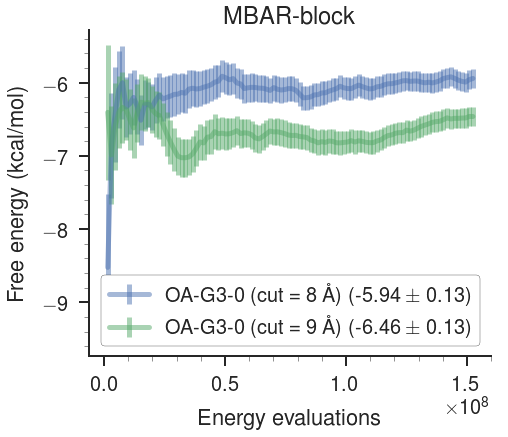

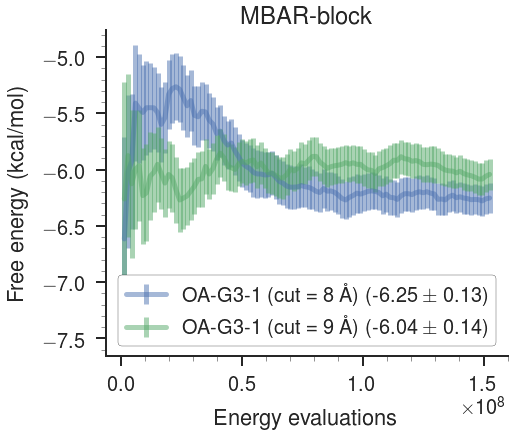

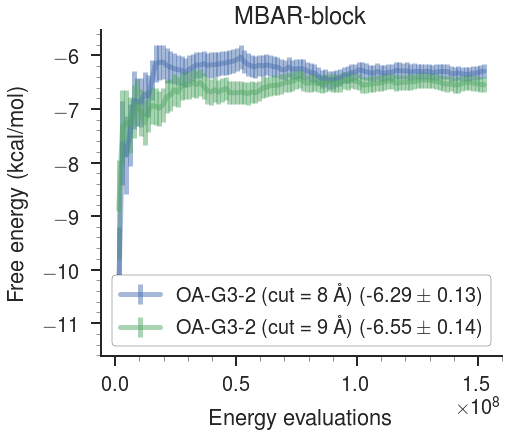

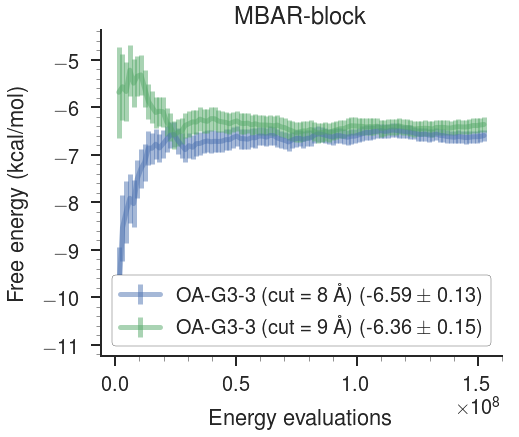

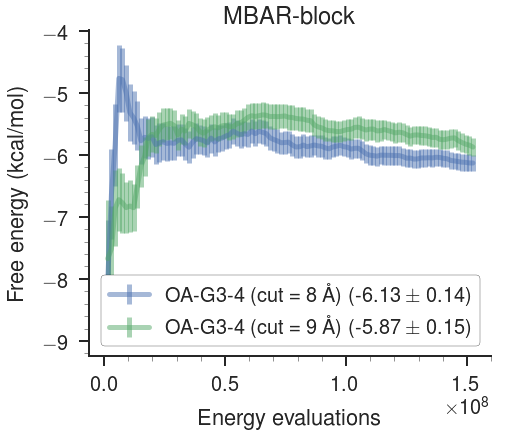

In [146]:
eights = [oa_g3_0, oa_g3_1, oa_g3_2, oa_g3_3, oa_g3_4]
nines  = [oa_g3_0_9, oa_g3_1_9, oa_g3_2_9, oa_g3_3_9, oa_g3_4_9]

for complx in range(5):

    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])

    eight_fe = -1 * (eights[complx][:,1] + eights[complx][:,4] + eights[complx][:,7])
    nine_fe  = -1 * (nines[complx][:,1] + nines[complx][:,4] + nines[complx][:,7])

    eight_sem = np.sqrt(eights[complx][:,2]**2 + eights[complx][:,5]**2)
    nine_sem = np.sqrt(nines[complx][:,2]**2 + nines[complx][:,5]**2)
    


    ax1.errorbar( (eights[complx][:,3] + eights[complx][:,6]) * 250, y=eight_fe, yerr=eight_sem, 
                 label=f'OA-G3-{complx} (cut = 8 \AA) ({eight_fe[-1]:0.2f} $\pm$ {eight_sem[-1]:0.2f})', alpha=0.5)
    
    ax1.errorbar( (nines[complx][:,3] + nines[complx][:,6]) * 250, y=nine_fe, yerr=nine_sem,
                 label=f'OA-G3-{complx} (cut = 9 \AA) ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)

    ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
    ax1.set_ylabel('Free energy (kcal/mol)')
    ax1.set_xlabel('Energy evaluations')
    ax1.set_title('MBAR-block')
    paper_plot(fig)

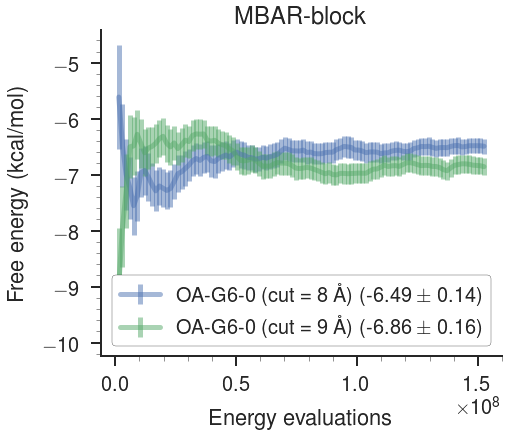

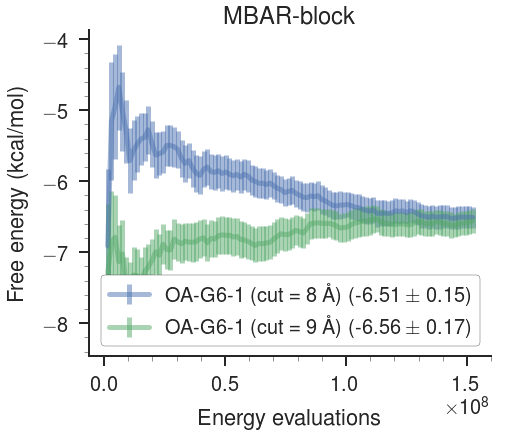

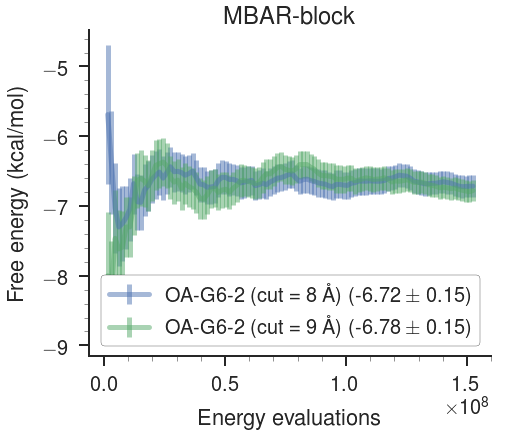

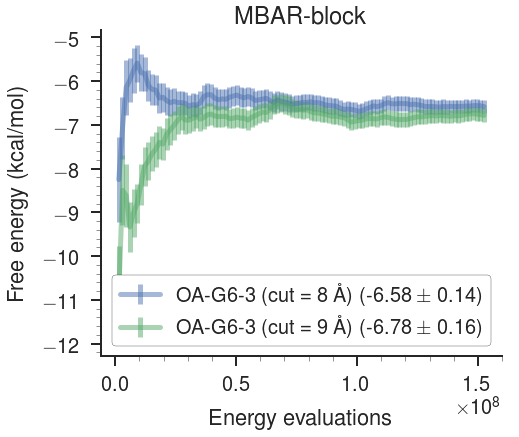

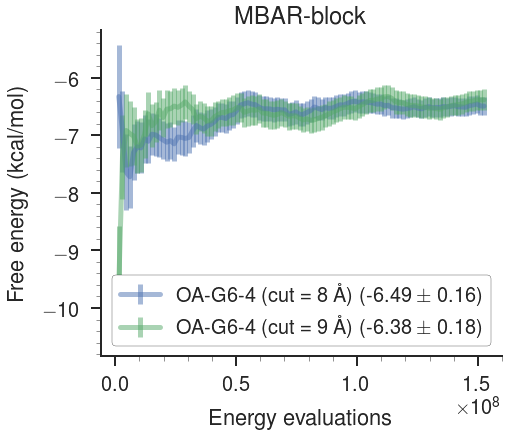

In [147]:
eights = [oa_g6_0, oa_g6_1, oa_g6_2, oa_g6_3, oa_g6_4]
nines  = [oa_g6_0_9, oa_g6_1_9, oa_g6_2_9, oa_g6_3_9, oa_g6_4_9]

for complx in range(5):

    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])

    eight_fe = -1 * (eights[complx][:,1] + eights[complx][:,4] + eights[complx][:,7])
    nine_fe  = -1 * (nines[complx][:,1] + nines[complx][:,4] + nines[complx][:,7])

    eight_sem = np.sqrt(eights[complx][:,2]**2 + eights[complx][:,5]**2)
    nine_sem = np.sqrt(nines[complx][:,2]**2 + nines[complx][:,5]**2)
    


    ax1.errorbar( (eights[complx][:,3] + eights[complx][:,6]) * 250, y=eight_fe, yerr=eight_sem, 
                 label=f'OA-G6-{complx} (cut = 8 \AA) ({eight_fe[-1]:0.2f} $\pm$ {eight_sem[-1]:0.2f})', alpha=0.5)
    
    ax1.errorbar( (nines[complx][:,3] + nines[complx][:,6]) * 250, y=nine_fe, yerr=nine_sem,
                 label=f'OA-G6-{complx} (cut = 9 \AA) ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)

    ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
    ax1.set_ylabel('Free energy (kcal/mol)')
    ax1.set_xlabel('Energy evaluations')
    ax1.set_title('MBAR-block')
    paper_plot(fig)

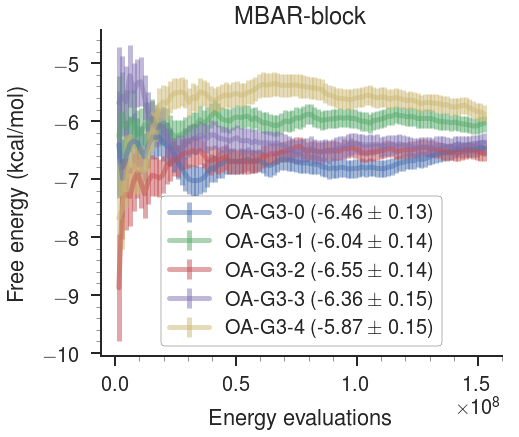

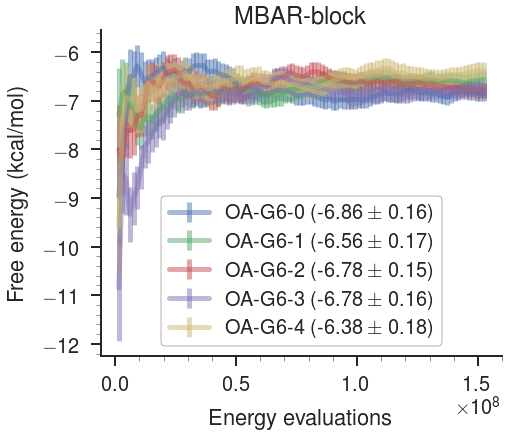

In [151]:
nines  = [oa_g3_0_9, oa_g3_1_9, oa_g3_2_9, oa_g3_3_9, oa_g3_4_9]

fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

for complx in range(5):

    nine_fe  = -1 * (nines[complx][:,1] + nines[complx][:,4] + nines[complx][:,7])
    nine_sem = np.sqrt(nines[complx][:,2]**2 + nines[complx][:,5]**2)
    
   
    ax1.errorbar( (nines[complx][:,3] + nines[complx][:,6]) * 250, y=nine_fe, yerr=nine_sem,
                 label=f'OA-G3-{complx} ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)

ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('MBAR-block')
paper_plot(fig)

nines  = [oa_g6_0_9, oa_g6_1_9, oa_g6_2_9, oa_g6_3_9, oa_g6_4_9]

fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

for complx in range(5):

    nine_fe  = -1 * (nines[complx][:,1] + nines[complx][:,4] + nines[complx][:,7])
    nine_sem = np.sqrt(nines[complx][:,2]**2 + nines[complx][:,5]**2)
    
   
    ax1.errorbar( (nines[complx][:,3] + nines[complx][:,6]) * 250, y=nine_fe, yerr=nine_sem,
                 label=f'OA-G6-{complx} ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)

ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('MBAR-block')
paper_plot(fig)


## Quick compare with extra data (more coming...)

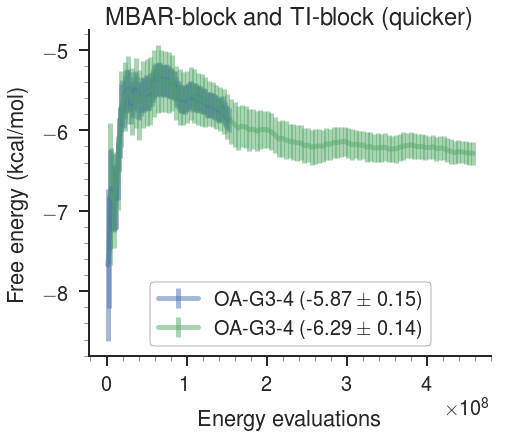

In [153]:
oa_g3_4_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-4-fe-all.log')
oa_g3_4_9_extra = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-4-ti-quicker.log')

fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])


nine_fe  = -1 * (oa_g3_4_9[:,1] + oa_g3_4_9[:,4] + oa_g3_4_9[:,7])
nine_sem = np.sqrt(oa_g3_4_9[:,2]**2 + oa_g3_4_9[:,5]**2)

nine_fe_extra  = -1 * (oa_g3_4_9_extra[:,1] + oa_g3_4_9_extra[:,4] + oa_g3_4_9_extra[:,7])
nine_sem_extra = np.sqrt(oa_g3_4_9_extra[:,2]**2 + oa_g3_4_9_extra[:,5]**2)

ax1.errorbar( (oa_g3_4_9[:,3] + oa_g3_4_9[:,6]) * 250, y=nine_fe, yerr=nine_sem,
             label=f'OA-G3-4 ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)

ax1.errorbar( (oa_g3_4_9_extra[:,3] + oa_g3_4_9_extra[:,6]) * 250, y=nine_fe_extra, yerr=nine_sem_extra,
             label=f'OA-G3-4 ({nine_fe_extra[-1]:0.2f} $\pm$ {nine_sem_extra[-1]:0.2f})', alpha=0.5)


ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('MBAR-block and TI-block (quicker)')
paper_plot(fig)

In [25]:
oa_g3_0_9_extra = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-0-ti-quicker.log')
oa_g3_1_9_extra = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-1-ti-quicker.log')
oa_g3_2_9_extra = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-2-ti-quicker.log')
oa_g3_3_9_extra = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-3-ti-quicker.log')
oa_g3_4_9_extra = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G3-4-ti-quicker.log')

oa_g6_0_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-0-ti-quicker-more.log')
oa_g6_1_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-1-ti-quicker-more.log')
oa_g6_2_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-2-ti-quicker-more.log')
oa_g6_3_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-3-ti-quicker-more.log')
oa_g6_4_9 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut9/OA-G6-4-ti-quicker-more.log')

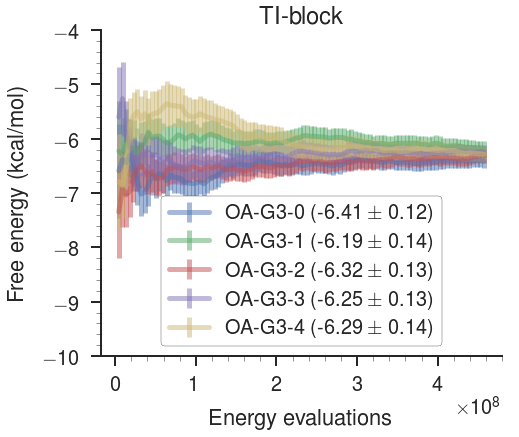

In [19]:
nines  = [oa_g3_0_9_extra, oa_g3_1_9_extra, oa_g3_2_9_extra, oa_g3_3_9_extra, oa_g3_4_9_extra]

fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

for complx in range(5):

    nine_fe  = -1 * (nines[complx][:,1] + nines[complx][:,4] + nines[complx][:,7])
    nine_sem = np.sqrt(nines[complx][:,2]**2 + nines[complx][:,5]**2)
    
   
    ax1.errorbar( (nines[complx][:,3] + nines[complx][:,6]) * 250, y=nine_fe, yerr=nine_sem,
                 label=f'OA-G3-{complx} ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)

ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_ylim([-10, -4])
ax1.set_title('TI-block')
paper_plot(fig)


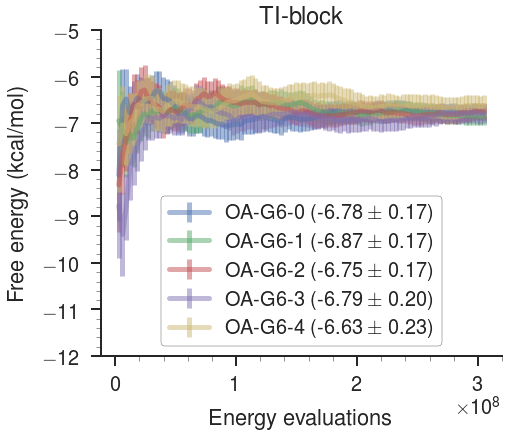

In [26]:
nines  = [oa_g6_0_9, oa_g6_1_9, oa_g6_2_9, oa_g6_3_9, oa_g6_4_9]

fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

for complx in range(5):

    nine_fe  = -1 * (nines[complx][:,1] + nines[complx][:,4] + nines[complx][:,7])
    nine_sem = np.sqrt(nines[complx][:,2]**2 + nines[complx][:,5]**2)
    
   
    ax1.errorbar( (nines[complx][:,3] + nines[complx][:,6]) * 250, y=nine_fe, yerr=nine_sem,
                 label=f'OA-G6-{complx} ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)

ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_ylim([-12, -5])
ax1.set_title('TI-block')
paper_plot(fig)


## Compare with `cut=10`...

In [115]:
oa_g3_0_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G3-0-fe.log')
oa_g3_1_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G3-1-fe.log')
oa_g3_2_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G3-2-fe.log')
oa_g3_3_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G3-3-fe.log')
oa_g3_4_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G3-4-fe.log')

oa_g6_0_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G6-0-fe.log')
oa_g6_1_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G6-1-fe.log')
oa_g6_2_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G6-2-fe.log')
oa_g6_3_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G6-3-fe.log')
oa_g6_4_10 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA-cut10/OA-G6-4-fe.log')

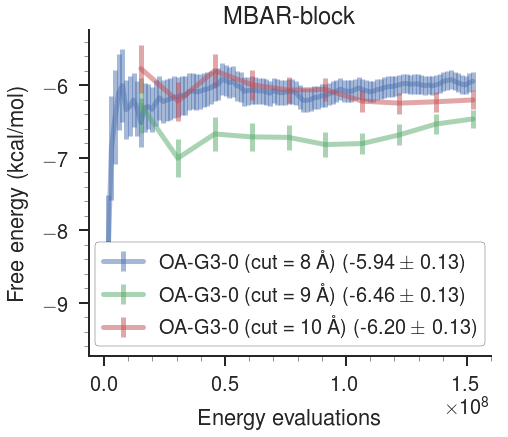

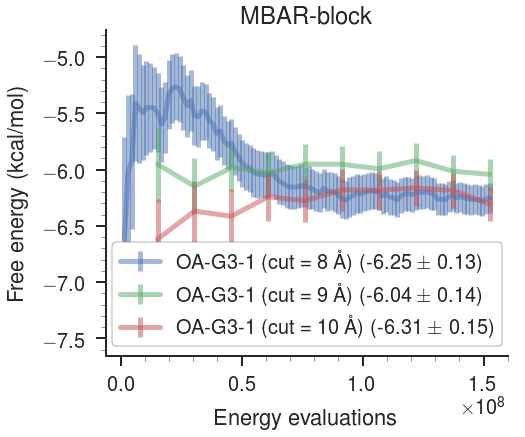

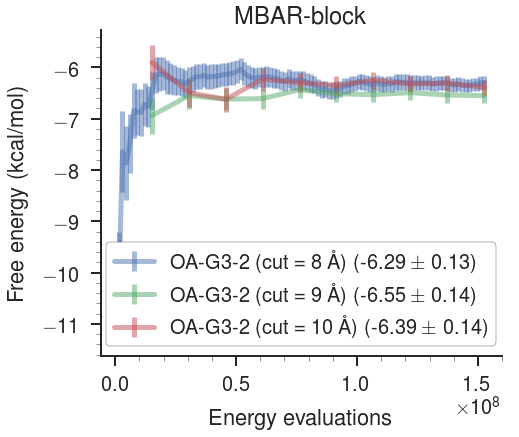

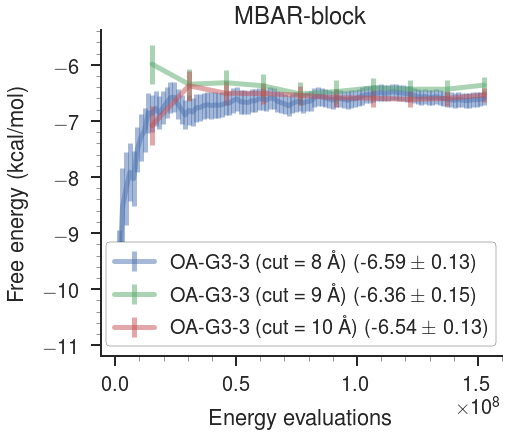

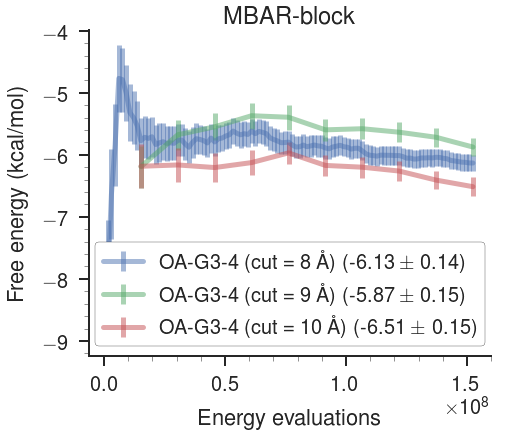

In [116]:
eights = [oa_g3_0, oa_g3_1, oa_g3_2, oa_g3_3, oa_g3_4]
nines  = [oa_g3_0_9, oa_g3_1_9, oa_g3_2_9, oa_g3_3_9, oa_g3_4_9]
tens   = [oa_g3_0_10, oa_g3_1_10, oa_g3_2_10, oa_g3_3_10, oa_g3_4_10]

for complx in range(5):

    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])

    eight_fe = -1 * (eights[complx][:,1] + eights[complx][:,4] + eights[complx][:,7])
    nine_fe  = -1 * (nines[complx][:,1] + nines[complx][:,4] + nines[complx][:,7])
    ten_fe   = -1 * (tens[complx][:,1] + tens[complx][:,4] + tens[complx][:,7])

    eight_sem = np.sqrt(eights[complx][:,2]**2 + eights[complx][:,5]**2)
    nine_sem = np.sqrt(nines[complx][:,2]**2 + nines[complx][:,5]**2)
    ten_sem =  np.sqrt(tens[complx][:,2]**2 + tens[complx][:,5]**2)
    
    ax1.errorbar( (eights[complx][:,3] + eights[complx][:,6]) * 250, y=eight_fe, yerr=eight_sem, 
                 label=f'OA-G3-{complx} (cut = 8 \AA) ({eight_fe[-1]:0.2f} $\pm$ {eight_sem[-1]:0.2f})', alpha=0.5)
    
    ax1.errorbar( (nines[complx][:,3] + nines[complx][:,6]) * 250, y=nine_fe, yerr=nine_sem,
                 label=f'OA-G3-{complx} (cut = 9 \AA) ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)
    
    ax1.errorbar( (tens[complx][:,3] + tens[complx][:,6]) * 250, y=ten_fe, yerr=ten_sem,
                 label=f'OA-G3-{complx} (cut = 10 \AA) ({ten_fe[-1]:0.2f} $\pm$ {ten_sem[-1]:0.2f})', alpha=0.5)

    ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
    ax1.set_ylabel('Free energy (kcal/mol)')
    ax1.set_xlabel('Energy evaluations')
    ax1.set_title('MBAR-block')
    paper_plot(fig)

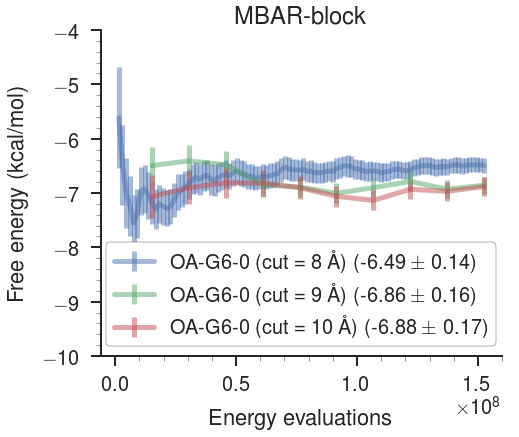

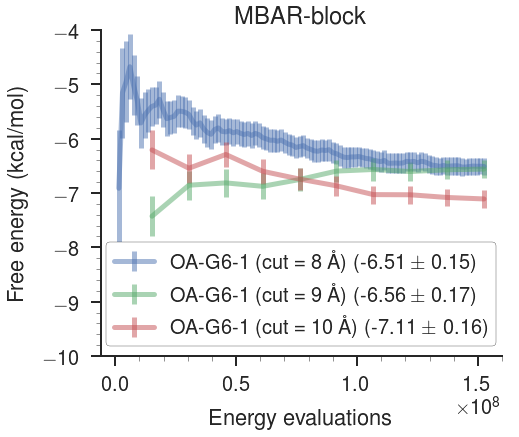

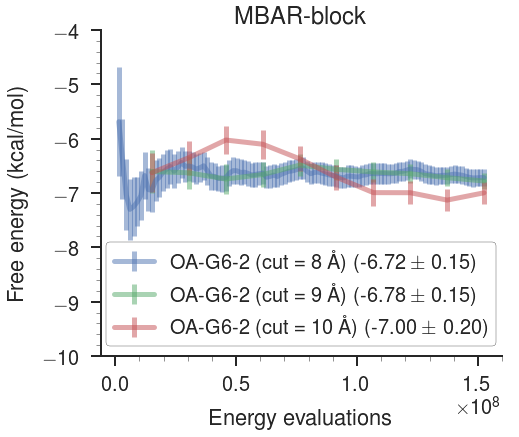

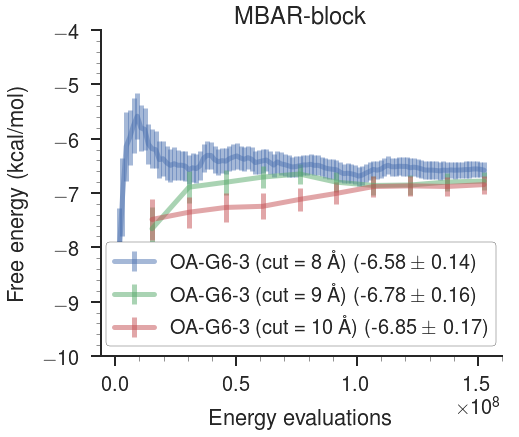

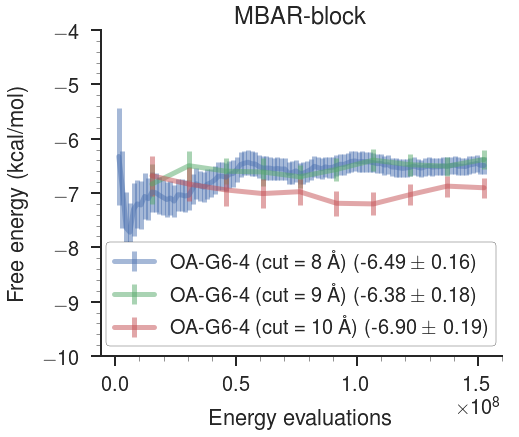

In [118]:
eights = [oa_g6_0, oa_g6_1, oa_g6_2, oa_g6_3, oa_g6_4]
nines  = [oa_g6_0_9, oa_g6_1_9, oa_g6_2_9, oa_g6_3_9, oa_g6_4_9]
tens   = [oa_g6_0_10, oa_g6_1_10, oa_g6_2_10, oa_g6_3_10, oa_g6_4_10]

for complx in range(5):

    fig = plt.figure(figsize=(6 * 1.2, 6))
    gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])

    eight_fe = -1 * (eights[complx][:,1] + eights[complx][:,4] + eights[complx][:,7])
    nine_fe  = -1 * (nines[complx][:,1] + nines[complx][:,4] + nines[complx][:,7])
    ten_fe   = -1 * (tens[complx][:,1] + tens[complx][:,4] + tens[complx][:,7])

    eight_sem = np.sqrt(eights[complx][:,2]**2 + eights[complx][:,5]**2)
    nine_sem = np.sqrt(nines[complx][:,2]**2 + nines[complx][:,5]**2)
    ten_sem =  np.sqrt(tens[complx][:,2]**2 + tens[complx][:,5]**2)
    
    ax1.errorbar( (eights[complx][:,3] + eights[complx][:,6]) * 250, y=eight_fe, yerr=eight_sem, 
                 label=f'OA-G6-{complx} (cut = 8 \AA) ({eight_fe[-1]:0.2f} $\pm$ {eight_sem[-1]:0.2f})', alpha=0.5)
    
    ax1.errorbar( (nines[complx][:,3] + nines[complx][:,6]) * 250, y=nine_fe, yerr=nine_sem,
                 label=f'OA-G6-{complx} (cut = 9 \AA) ({nine_fe[-1]:0.2f} $\pm$ {nine_sem[-1]:0.2f})', alpha=0.5)
    
    ax1.errorbar( (tens[complx][:,3] + tens[complx][:,6]) * 250, y=ten_fe, yerr=ten_sem,
                 label=f'OA-G6-{complx} (cut = 10 \AA) ({ten_fe[-1]:0.2f} $\pm$ {ten_sem[-1]:0.2f})', alpha=0.5)

    ax1.legend(frameon=True, loc='lower center', framealpha=1.0, edgecolor='k')
    ax1.set_ylabel('Free energy (kcal/mol)')
    ax1.set_xlabel('Energy evaluations')
    ax1.set_title('MBAR-block')
    ax1.set_ylim([-10, -4])
    paper_plot(fig)

## OA-G6 (MBAR-block)

In [83]:
oa_g6_0 = np.genfromtxt('OA-G6-0-fe.log')
oa_g6_1 = np.genfromtxt('OA-G6-1-fe.log')
oa_g6_2 = np.genfromtxt('OA-G6-2-fe.log')
oa_g6_3 = np.genfromtxt('OA-G6-3-fe.log')
oa_g6_4 = np.genfromtxt('OA-G6-4-fe.log')

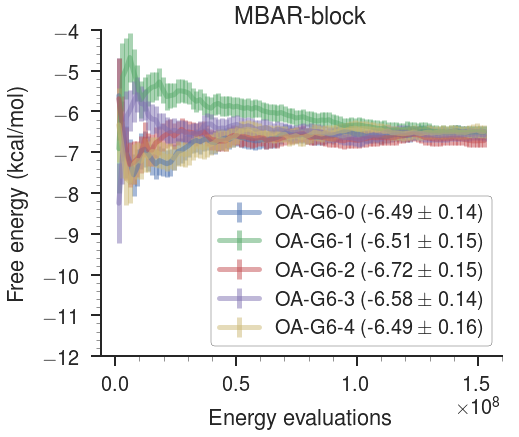

In [94]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

oa_g6_0_fe = -1 * (oa_g6_0[:,1] + oa_g6_0[:,4] + oa_g6_0[:,7])
oa_g6_1_fe = -1 * (oa_g6_1[:,1] + oa_g6_1[:,4] + oa_g6_1[:,7])
oa_g6_2_fe = -1 * (oa_g6_2[:,1] + oa_g6_2[:,4] + oa_g6_2[:,7])
oa_g6_3_fe = -1 * (oa_g6_3[:,1] + oa_g6_3[:,4] + oa_g6_3[:,7])
oa_g6_4_fe = -1 * (oa_g6_4[:,1] + oa_g6_4[:,4] + oa_g6_4[:,7])


oa_g6_0_sem = np.sqrt(oa_g6_0[:,2]**2 + oa_g6_0[:,5]**2)
oa_g6_1_sem = np.sqrt(oa_g6_1[:,2]**2 + oa_g6_1[:,5]**2)
oa_g6_2_sem = np.sqrt(oa_g6_2[:,2]**2 + oa_g6_2[:,5]**2)
oa_g6_3_sem = np.sqrt(oa_g6_3[:,2]**2 + oa_g6_3[:,5]**2)
oa_g6_4_sem = np.sqrt(oa_g6_4[:,2]**2 + oa_g6_4[:,5]**2)


ax1.errorbar( (oa_g6_0[:,3] + oa_g6_0[:,6]) * 250, y=oa_g6_0_fe, yerr=oa_g6_0_sem, 
             label=f'OA-G6-0 ({oa_g6_0_fe[-1]:0.2f} $\pm$ {oa_g6_0_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g6_1[:,3] + oa_g6_1[:,6]) * 250, y=oa_g6_1_fe, yerr=oa_g6_1_sem, 
             label=f'OA-G6-1 ({oa_g6_1_fe[-1]:0.2f} $\pm$ {oa_g6_1_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g6_2[:,3] + oa_g6_2[:,6]) * 250, y=oa_g6_2_fe, yerr=oa_g6_2_sem, 
             label=f'OA-G6-2 ({oa_g6_2_fe[-1]:0.2f} $\pm$ {oa_g6_2_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g6_3[:,3] + oa_g6_3[:,6]) * 250, y=oa_g6_3_fe, yerr=oa_g6_3_sem, 
             label=f'OA-G6-3 ({oa_g6_3_fe[-1]:0.2f} $\pm$ {oa_g6_3_sem[-1]:0.2f})', alpha=0.5)
ax1.errorbar( (oa_g6_4[:,3] + oa_g6_4[:,6]) * 250, y=oa_g6_4_fe, yerr=oa_g6_4_sem, 
             label=f'OA-G6-4 ({oa_g6_4_fe[-1]:0.2f} $\pm$ {oa_g6_4_sem[-1]:0.2f})', alpha=0.5)


ax1.legend(frameon=True, loc=4, framealpha=1.0, edgecolor='k')
ax1.set_ylim([-12, -4])
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('MBAR-block')
paper_plot(fig)

In [102]:
print(f'Mean OA-G6: {np.mean([oa_g6_0_fe[-1], oa_g6_1_fe[-1], oa_g6_2_fe[-1], oa_g6_3_fe[-1], oa_g6_4_fe[-1]])}')
print(f'SEM OA-G6: {np.sqrt(oa_g6_0_sem[-1]**2 + oa_g6_1_sem[-1]**2 + oa_g6_2_sem[-1]**2 + \
                            oa_g6_3_sem[-1]**2 + oa_g6_4_sem[-1]**2)}')

Mean OA-G6: -6.559029376802444
SEM OA-G6: 0.33180634368947837


In [106]:
np.std([oa_g6_0_fe[-1], oa_g6_1_fe[-1], oa_g6_2_fe[-1], oa_g6_3_fe[-1], oa_g6_4_fe[-1]]) / np.sqrt(5)

0.037928169246408287

## Analyze the difference in random seeds...

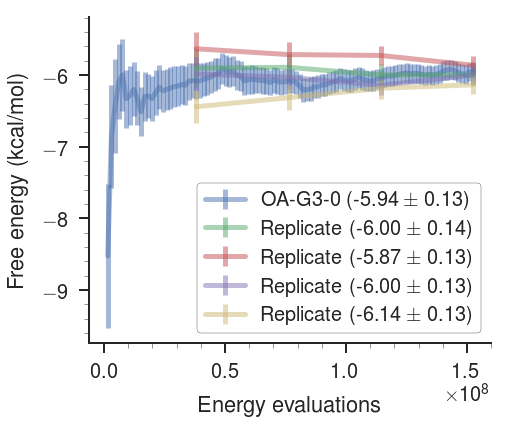

In [51]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

seed_0 = np.genfromtxt('/home/dslochower/vulcan/SAMPLing-test-random-seed/windows-0-fe.log')
seed_1 = np.genfromtxt('/home/dslochower/vulcan/SAMPLing-test-random-seed/windows-1-fe.log')
seed_2 = np.genfromtxt('/home/dslochower/vulcan/SAMPLing-test-random-seed/windows-2-fe.log')
seed_3 = np.genfromtxt('/home/dslochower/vulcan/SAMPLing-test-random-seed/windows-3-fe.log')

oa_g3_0_fe = -1 * (oa_g3_0[:,1] + oa_g3_0[:,4] + oa_g3_0[:,7])
seed_0_fe =  -1 * (seed_0[:,1] + seed_0[:,4] + seed_0[:,7])
seed_1_fe =  -1 * (seed_1[:,1] + seed_1[:,4] + seed_1[:,7])
seed_2_fe =  -1 * (seed_2[:,1] + seed_2[:,4] + seed_2[:,7])
seed_3_fe =  -1 * (seed_3[:,1] + seed_3[:,4] + seed_3[:,7])

oa_g3_0_sem = np.sqrt(oa_g3_0[:,2]**2 + oa_g3_0[:,5]**2)
seed_0_sem =  np.sqrt(seed_0[:,2]**2 + seed_0[:,5]**2)
seed_1_sem = np.sqrt(seed_1[:,2]**2 + seed_1[:,5]**2)
seed_2_sem = np.sqrt(seed_2[:,2]**2 + seed_2[:,5]**2)
seed_3_sem = np.sqrt(seed_3[:,2]**2 + seed_3[:,5]**2)

ax1.errorbar( (oa_g3_0[:,3] + oa_g3_0[:,6]) * 250, y=oa_g3_0_fe, yerr=oa_g3_0_sem, 
             label=f'OA-G3-0 ({oa_g3_0_fe[-1]:0.2f} $\pm$ {oa_g3_0_sem[-1]:0.2f})', alpha=0.5)

ax1.errorbar( (seed_0[:,3] + seed_0[:,6]) * 250, y=seed_0_fe, yerr=seed_0_sem, 
             label=f'Replicate ({seed_0_fe[-1]:0.2f} $\pm$ {seed_0_sem[-1]:0.2f})', alpha=0.5)

ax1.errorbar( (seed_1[:,3] + seed_1[:,6]) * 250, y=seed_1_fe, yerr=seed_1_sem, 
             label=f'Replicate ({seed_1_fe[-1]:0.2f} $\pm$ {seed_1_sem[-1]:0.2f})', alpha=0.5)

ax1.errorbar( (seed_2[:,3] + seed_2[:,6]) * 250, y=seed_2_fe, yerr=seed_2_sem, 
             label=f'Replicate ({seed_2_fe[-1]:0.2f} $\pm$ {seed_2_sem[-1]:0.2f})', alpha=0.5)

ax1.errorbar( (seed_3[:,3] + seed_3[:,6]) * 250, y=seed_3_fe, yerr=seed_3_sem, 
             label=f'Replicate ({seed_3_fe[-1]:0.2f} $\pm$ {seed_3_sem[-1]:0.2f})', alpha=0.5)

ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
paper_plot(fig)

On `kirkwood`, convergence with extra `a000` sampling should be happening...

## Compare with extra `a000` sampling...

In [62]:
oa_g3_0_extra_a000 = np.genfromtxt('/home/dslochower/kirkwood/projects/SAMPLing-2/SAMPLing/OA/OA-G3-0-fe.log')

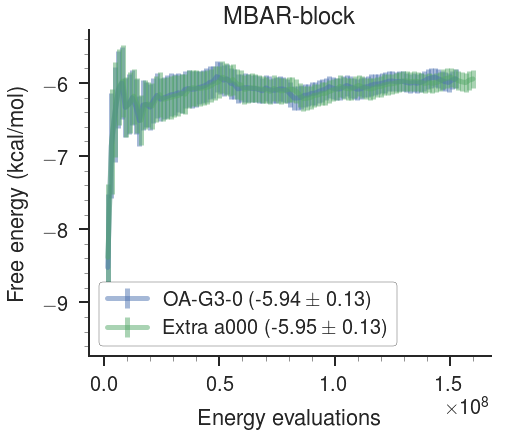

In [63]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

oa_g3_0_fe            = -1 * (oa_g3_0[:,1] + oa_g3_0[:,4] + oa_g3_0[:,7])
oa_g3_0_extra_a000_fe = -1 * (oa_g3_0_extra_a000[:,1] + oa_g3_0_extra_a000[:,4] + oa_g3_0_extra_a000[:,7])

oa_g3_0_sem            = np.sqrt(oa_g3_0[:,2]**2 + oa_g3_0[:,5]**2)
oa_g3_0_extra_a000_sem = np.sqrt(oa_g3_0_extra_a000[:,2]**2 + oa_g3_0_extra_a000[:,5]**2)

ax1.errorbar( (oa_g3_0[:,3] + oa_g3_0[:,6]) * 250, y=oa_g3_0_fe, yerr=oa_g3_0_sem, 
             label=f'OA-G3-0 ({oa_g3_0_fe[-1]:0.2f} $\pm$ {oa_g3_0_sem[-1]:0.2f})', alpha=0.5)

ax1.errorbar( (oa_g3_0_extra_a000[:,3] + oa_g3_0_extra_a000[:,6]) * 250, y=oa_g3_0_extra_a000_fe, yerr=oa_g3_0_extra_a000_sem, 
             label=f'Extra a000 ({oa_g3_0_extra_a000_fe[-1]:0.2f} $\pm$ {oa_g3_0_extra_a000_sem[-1]:0.2f})', alpha=0.5)

ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('MBAR-block')
paper_plot(fig)

## Compare with TI

In [66]:
oa_g3_0_ti = np.genfromtxt('OA-G3-0-ti-fe.log')

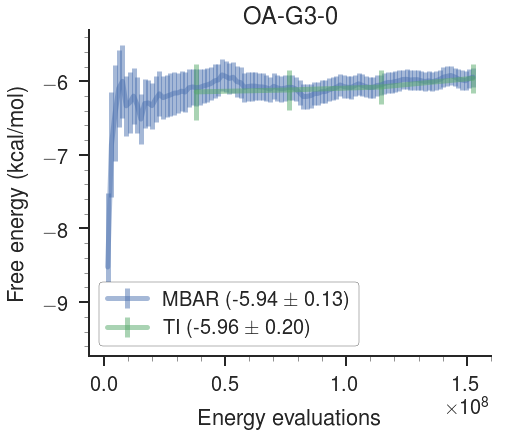

In [67]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

oa_g3_0_fe    = -1 * (oa_g3_0[:,1] + oa_g3_0[:,4] + oa_g3_0[:,7])
oa_g3_0_ti_fe = -1 * (oa_g3_0_ti[:,1] + oa_g3_0_ti[:,4] + oa_g3_0_ti[:,7])

oa_g3_0_sem    = np.sqrt(oa_g3_0[:,2]**2 + oa_g3_0[:,5]**2)
oa_g3_0_ti_sem = np.sqrt(oa_g3_0_ti[:,2]**2 + oa_g3_0_ti[:,5]**2)

ax1.errorbar( (oa_g3_0[:,3] + oa_g3_0[:,6]) * 250, y=oa_g3_0_fe, yerr=oa_g3_0_sem, 
             label=f'MBAR ({oa_g3_0_fe[-1]:0.2f} $\pm$ {oa_g3_0_sem[-1]:0.2f})', alpha=0.5)

ax1.errorbar( (oa_g3_0_ti[:,3] + oa_g3_0_ti[:,6]) * 250, y=oa_g3_0_ti_fe, yerr=oa_g3_0_ti_sem, 
             label=f'TI ({oa_g3_0_ti_fe[-1]:0.2f} $\pm$ {oa_g3_0_ti_sem[-1]:0.2f})', alpha=0.5)

ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('OA-G3-0')
paper_plot(fig)

In [68]:
oa_g3_1_ti = np.genfromtxt('OA-G3-1-ti-fe.log')

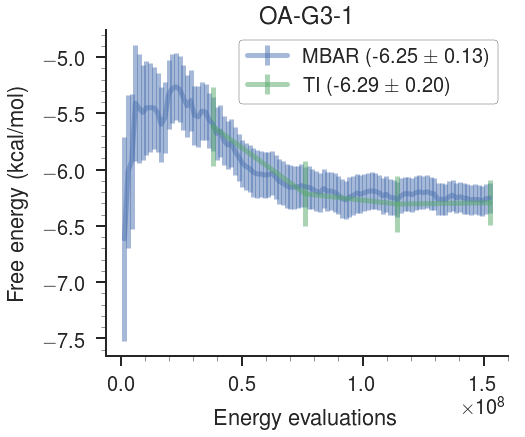

In [69]:
fig = plt.figure(figsize=(6 * 1.2, 6))
gs = GridSpec(1, 1, wspace=0.2, hspace=0.5)
ax1 = plt.subplot(gs[0, 0])

oa_g3_1_fe    = -1 * (oa_g3_1[:,1] + oa_g3_1[:,4] + oa_g3_1[:,7])
oa_g3_1_ti_fe = -1 * (oa_g3_1_ti[:,1] + oa_g3_1_ti[:,4] + oa_g3_1_ti[:,7])

oa_g3_1_sem    = np.sqrt(oa_g3_1[:,2]**2 + oa_g3_1[:,5]**2)
oa_g3_1_ti_sem = np.sqrt(oa_g3_1_ti[:,2]**2 + oa_g3_1_ti[:,5]**2)

ax1.errorbar( (oa_g3_1[:,3] + oa_g3_1[:,6]) * 250, y=oa_g3_1_fe, yerr=oa_g3_1_sem, 
             label=f'MBAR ({oa_g3_1_fe[-1]:0.2f} $\pm$ {oa_g3_1_sem[-1]:0.2f})', alpha=0.5)

ax1.errorbar( (oa_g3_1_ti[:,3] + oa_g3_1_ti[:,6]) * 250, y=oa_g3_1_ti_fe, yerr=oa_g3_1_ti_sem, 
             label=f'TI ({oa_g3_1_ti_fe[-1]:0.2f} $\pm$ {oa_g3_1_ti_sem[-1]:0.2f})', alpha=0.5)

ax1.legend(frameon=True, loc=0, framealpha=1.0, edgecolor='k')
ax1.set_ylabel('Free energy (kcal/mol)')
ax1.set_xlabel('Energy evaluations')
ax1.set_title('OA-G3-1')
paper_plot(fig)

## Test K-S

In [74]:
from scipy.stats import ks_2samp

In [76]:
ks_2samp(oa_g3_0_fe, oa_g3_1_fe)

Ks_2sampResult(statistic=0.32000000000000006, pvalue=4.8051882191107212e-05)

In [77]:
ks_2samp(oa_g3_2_fe, oa_g3_1_fe)

Ks_2sampResult(statistic=0.58999999999999997, pvalue=3.9632367409759951e-16)

In [78]:
ks_2samp(seed_0_fe, seed_1_fe)

Ks_2sampResult(statistic=1.0, pvalue=0.011065637015803861)

In [79]:
ks_2samp(seed_0_fe, seed_2_fe)

Ks_2sampResult(statistic=0.75, pvalue=0.10749046502096637)

In [80]:
ks_2samp(seed_0_fe, seed_2_fe)

Ks_2sampResult(statistic=0.75, pvalue=0.10749046502096637)

In [81]:
ks_2samp(seed_0_fe, seed_3_fe)

Ks_2sampResult(statistic=1.0, pvalue=0.011065637015803861)

## How does the SEM of a single run compare to the standard deviation of all runs?

### First, the different conformations...

In [154]:
print('Mean of SEMs, each calculated from a single simulation:')
print(np.mean([oa_g3_0_sem[-1], oa_g3_1_sem[-1], oa_g3_2_sem[-1], oa_g3_3_sem[-1], oa_g3_4_sem[-1]]))
print('StdDDev of all means:')
print(np.std([oa_g3_0_fe[-1], oa_g3_1_fe[-1], oa_g3_2_fe[-1], oa_g3_3_fe[-1], oa_g3_4_fe[-1]]))
print('SEM calculated using the standard deviation of all means:')
print(np.std([oa_g3_0_fe[-1], oa_g3_1_fe[-1], oa_g3_2_fe[-1], oa_g3_3_fe[-1], oa_g3_4_fe[-1]]) / np.sqrt(5))

Mean of SEMs, each calculated from a single simulation:
0.131185081395
StdDDev of all means:
0.213592758852
SEM calculated using the standard deviation of all means:
0.0955215856591


### Second, the random seeds...

In [156]:
print('Mean of SEMs, each calculated from a single simulation:')
print(np.mean([seed_0_sem[-1], seed_1_sem[-1], seed_2_sem[-1], seed_3_sem[-1], oa_g3_0_sem[-1]]))
print('StdDDev of all means:')
print(np.std([seed_0_fe[-1], seed_1_fe[-1], seed_2_fe[-1], seed_3_fe[-1], oa_g3_0_fe[-1]]))
print('SEM calculated using the standard deviation of all means:')
print(np.std([seed_0_fe[-1], seed_1_fe[-1], seed_2_fe[-1], seed_3_fe[-1], oa_g3_0_fe[-1]]) / np.sqrt(5))

Mean of SEMs, each calculated from a single simulation:
0.132726294313
StdDDev of all means:
0.0892190760464
SEM calculated using the standard deviation of all means:
0.0398999837859
